<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/NewtonRaphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

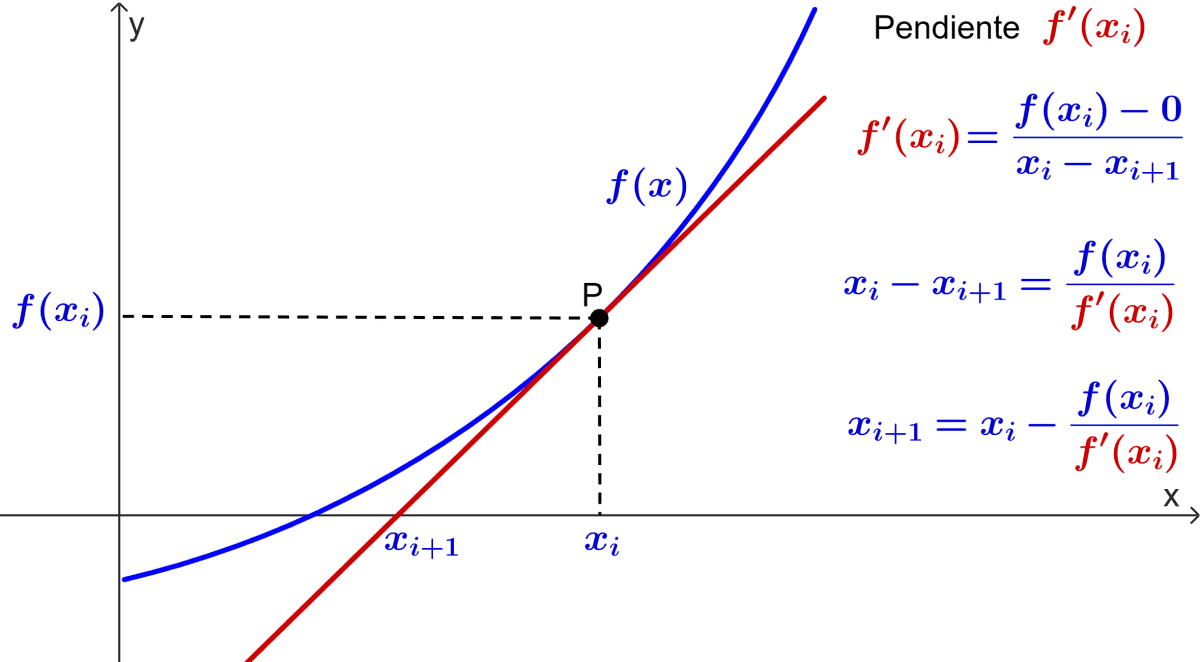

**Carga de librerías**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy import diff
from sympy import sin
from sympy import cos
from scipy.misc import derivative

**Ingreso valor inicial**

In [21]:
x0  = float(input("Ingrese la frontera inferior del intervalo x0 "))
err = float(input("Ingrese valor del error aceptable "))

Ingrese la frontera inferior del intervalo x0 0.8
Ingrese valor del error aceptable 0.001


**Grafica de f(x)  = x^10 -1**

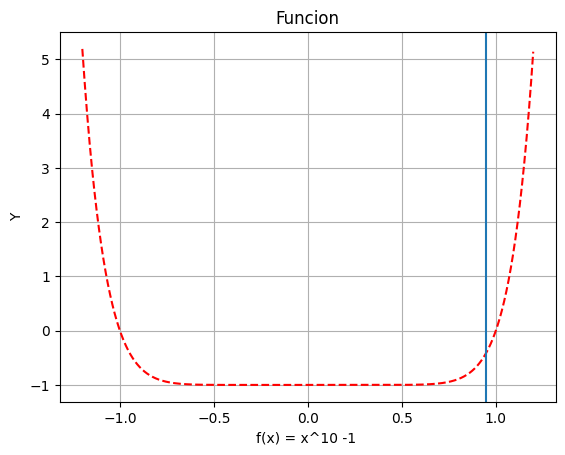

In [25]:
xl = -1.2
xu = 1.2

def graf_f():
  X = list(np.arange(xl, xu, 0.001))
  #Y=[(2*math.sin(x) -(x**2)/10) for x in X]
  Y=[((x**10) - 1) for x in X]
  plt.title("Funcion")
  plt.xlabel("f(x) = x^10 -1 ")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x= 0.95, ymin=0.0, ymax=30)
  plt.grid()
  plt.show()
graf_f()

**Derivación simbólica**

In [11]:
x = symbols('x')
y = x**10 - 1
fprime = diff(y,x)
print(fprime)

10*x**9


**Clase Newton_Raphson**

In [16]:
#Esta clase calcula la raiz de una función**
class NewtonRaphson:
  def __init__(self, x0, err):
    self.__xi = x0
    self.__xlast = 0
    self.__f_last = 0
    self.__err = err
    self.__fd1 = 1
    self.__list_error = []

  def __derive(self, x):                                                        #Calcula simbólicamente la derivada
    fd1 = 10*(x**9)
    self.__fd1 = fd1

  def __cal_x_mas(self, x):                                                     #Calcula el Xi+1
    self.__derive(x)
    x_fut = 0
    if self.__fd1 != 0:
       x_fut = x - self.__f_last / self.__fd1
    return x_fut

  def __cal_f(self, x):                                                         #Calcula la función f(x)
      f = x**10 - 1
      return f

  def __printf(self,i, x,f, fd1, dif_x):                                        #Muestra en consola los resultados parciale
      print("_______________________________________Resultados_________________________________________")
      print("i = ",i)
      print("x = ",x)
      print("f(x) = ",f)
      print("f'(x) = ", fd1)
      print("dif_x = ", dif_x)

  def getError(self):                                                           #Retorna lista de errores (Diferencia de las xi)
    return self.__list_error

  def Raiz(self):                                                               #Retorna la raiz
      dif_x = 1
      xlast = 0
      xfut =0
      i = 0
      self.__xi =2.5
      while  np.absolute(dif_x)> err:
         self.__f_last = self.__cal_f(self.__xi)
         xfut = self.__cal_x_mas(self.__xi)   #3
         self.__printf(i,self.__xi, self.__f_last, self.__fd1, dif_x)
         self.__xlast = self.__xi     #3
         self.__xi = xfut
         dif_x = self.__xi - self.__xlast
         self.__list_error.append(dif_x)
         i += 1

      return self.__f_last,  self.__xlast



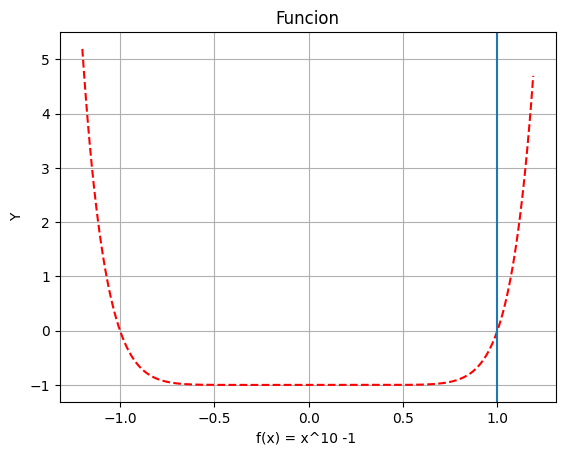

In [26]:
xl = -1.2
xu = 1.2

def graf_f():                                    #Grafica la raiz
  X = list(np.arange(xl, xu, 0.01))
  Y=[(x**10 -(1)) for x in X]

  plt.title("Funcion")
  plt.xlabel("f(x) = x^10 -1 ")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x=  1.0001072190813836, ymin=0.0, ymax=10)
  plt.grid()
  plt.show()
graf_f()

**Grafica error**

**Función principal**

In [20]:
listaError = []
obj = NewtonRaphson(x0, err)
def main():
  f, raiz = obj.Raiz()
  print("_______________________________Resultados de la busqueda de la raiz_____________________________")
  print("Raiz de f(x) = ", raiz)
  print("f(x) = ", f )                                                          #Imprime el valor de la raiz y f(raiz)
if  __name__=='__main__':
  main()
listaError = obj.getError()

_______________________________________Resultados_________________________________________
i =  0
x =  2.5
f(x) =  9535.7431640625
f'(x) =  38146.97265625
dif_x =  1
_______________________________________Resultados_________________________________________
i =  1
x =  2.2500262144
f(x) =  3324.644170881274
f'(x) =  14780.468554532383
dif_x =  -0.24997378559999994
_______________________________________Resultados_________________________________________
i =  2
x =  2.025091249813794
f(x) =  1158.967900572165
f'(x) =  5727.978433953648
dif_x =  -0.2249349645862062
_______________________________________Resultados_________________________________________
i =  3
x =  1.822756706495305
f(x) =  403.8433856654496
f'(x) =  2221.050040429476
dif_x =  -0.20233454331848888
_______________________________________Resultados_________________________________________
i =  4
x =  1.6409312733378603
f(x) =  140.54805951992066
f'(x) =  862.6080922450466
dif_x =  -0.1818254331574447
______________________

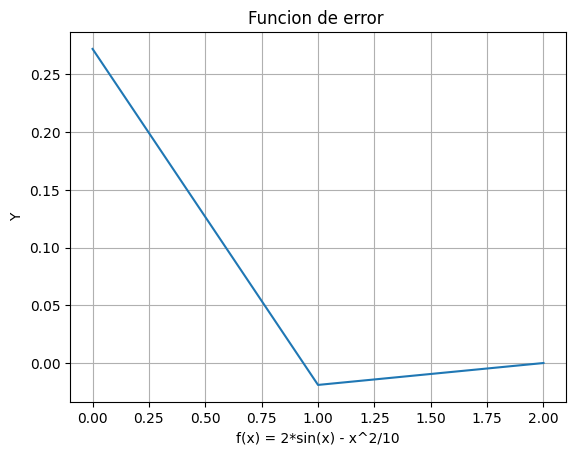

In [ ]:
xl = 0
xu = 8

def graf_f():
  X = listaError
  Y=[(2*math.sin(x) -(x**2)/10) for x in X]
  plt.title("Funcion de error ")
  plt.xlabel("f(x) = 2*sin(x) - x^2/10")
  plt.ylabel("Y")
  plt.plot(listaError)
  plt.grid()
  plt.show()
graf_f()